<a href="https://colab.research.google.com/github/Barryjuait/Barryjuait/blob/master/Personal%20Projects/Clinical_Data_on_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
Detailed dataset comprising health and demographic data of 100,000 individuals, aimed at facilitating diabetes-related research and predictive modeling. This dataset includes information on gender, age, location, race, hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level, and diabetes status.

##Dataset Use Cases

- Predictive Modeling: Build models to predict the likelihood of diabetes based on demographic and health-related features.
- Health Analytics: Analyze the correlation between different health metrics (e.g., BMI, HbA1c level) and diabetes.
- Demographic Studies: Examine the distribution of diabetes across different demographic groups and locations.
- Public Health Research: Identify risk factors for diabetes and target interventions to high-risk groups.
- Clinical Research: Study the relationship between comorbid conditions like hypertension and heart disease with diabetes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [52]:
# Set the path to the file you'd like to load
homeFolder = '/content/drive/MyDrive/Colab Notebooks/Diabetes/'
File = homeFolder + 'diabetes_dataset.csv'

df =pd.read_csv(File)

df.head()


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [53]:
# Checking for missing values
print(df.isnull().sum())


year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64


People with dibetes tend to be overweight:

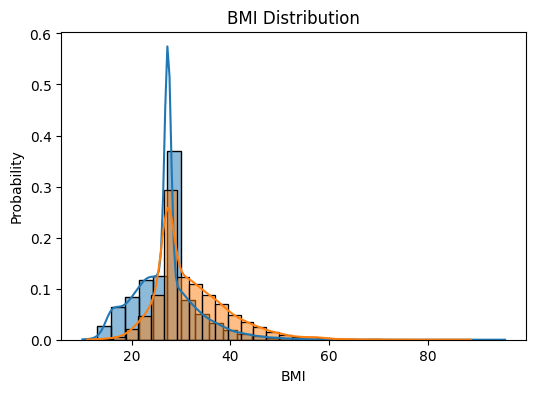

In [54]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
sns.histplot(data = df[df.diabetes == 0], x = 'bmi', ax = ax, bins = 30, kde=True, stat = 'probability')
sns.histplot(data = df[df.diabetes == 1], x = 'bmi', ax = ax, bins = 30, kde=True, stat = 'probability')
ax.set_title('BMI Distribution')
ax.set_xlabel('BMI')
ax.set_ylabel('Probability')
plt.show()

2.3 Diabetes Prevalence

Plot the proportion of diabetic vs. non-diabetic individuals.

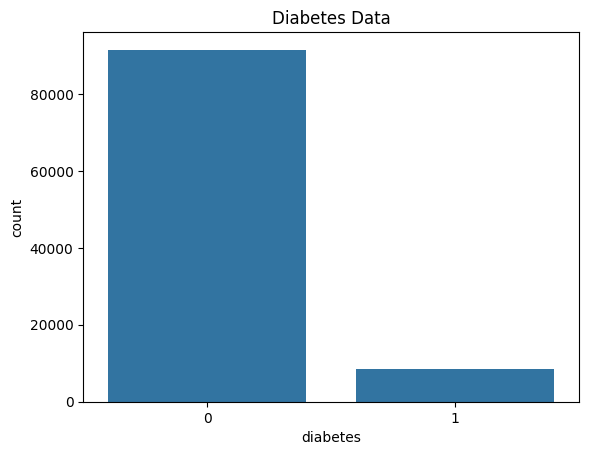

In [55]:
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Data')
plt.show()

In [56]:
#check for ethnicities
colNames = list(df.columns)
race_cols = [col for col in colNames if 'race' in col.lower()]
race_cols

['race:AfricanAmerican',
 'race:Asian',
 'race:Caucasian',
 'race:Hispanic',
 'race:Other']

In [57]:
df['Ethnicity'] = 'Other'

for ix, ethn in enumerate(race_cols):
    group = ethn.split(':')[1]
    df['Ethnicity'][df[ethn] == 1] = group

df['Ethnicity'].astype('category')
df.drop(columns=race_cols, inplace=True)
df.head()

,year,gender,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,Ethnicity
0,2020,Female,32.0,Alabama,0,0,never,27.32,5.0,100,0,Other
1,2015,Female,29.0,Alabama,0,0,never,19.95,5.0,90,0,Asian
2,2015,Male,18.0,Alabama,0,0,never,23.76,4.8,160,0,Other
3,2015,Male,41.0,Alabama,0,0,never,27.32,4.0,159,0,Caucasian
4,2016,Female,52.0,Alabama,0,0,never,23.75,6.5,90,0,AfricanAmerican


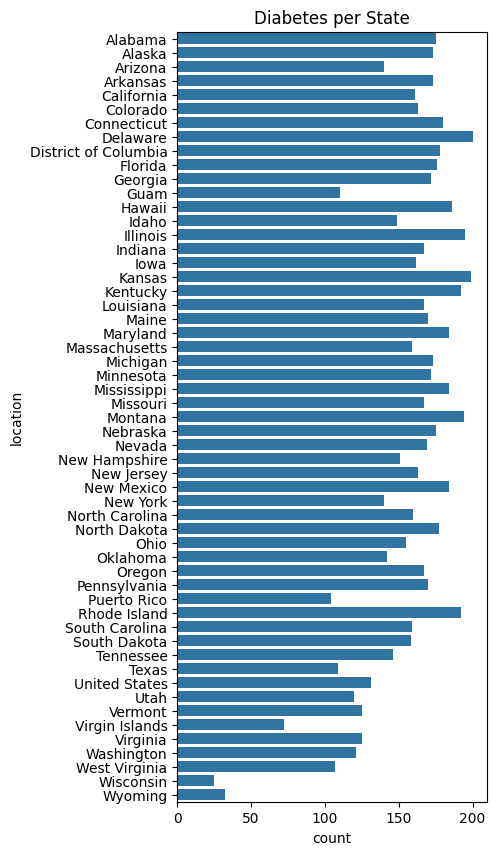

In [75]:
fig, ax = plt.subplots(1,1, figsize = (4,10))
sns.countplot(y='location', data=df[df.diabetes == 1], ax = ax)
#sns.countplot(y='location', data=df)
plt.title('Diabetes per State')
plt.show()

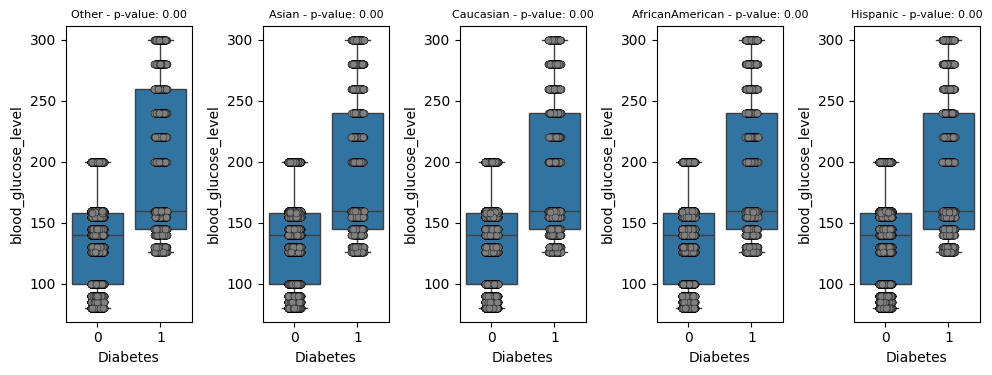

In [68]:
from scipy.stats import ttest_ind

var = 'blood_glucose_level'
groups = list(df.Ethnicity.unique())
fig, ax = plt.subplots(1, len(groups), figsize=(10, 4))
for ix, ethn in enumerate(groups):

  diabetic = df[(df['diabetes'] == 1) & (df['Ethnicity'] == ethn)][var]
  non_diabetic = df[(df['diabetes'] == 0) & (df['Ethnicity'] == ethn)][var]

  stat, p_value = ttest_ind(diabetic, non_diabetic)
  #print(f"T-test p-value: {p_value}")
  sns.boxplot(data = df[df['Ethnicity'] == ethn], ax = ax[ix], x = 'diabetes', y = var)
  sns.stripplot(data = df[df['Ethnicity'] == ethn], ax = ax[ix], x = 'diabetes', y = var, color = '.5', edgecolor='k', linewidth = 0.25)
  ax[ix].set_title(f'Ethnicity: {ethn}')
  ax[ix].set_xlabel('Diabetes')
  ax[ix].set_ylabel(var)
  ax[ix].set_title(f'{ethn} - p-value: {p_value:.2f}', fontsize = 8)
    #ax[ix].set_ylim(0, 300)
plt.suptitle('')
plt.tight_layout()
plt.show()

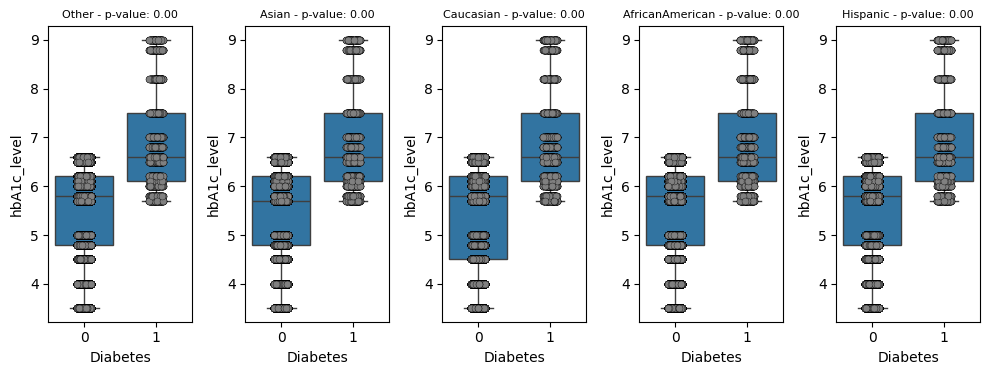

In [67]:
var = 'hbA1c_level'
groups = list(df.Ethnicity.unique())
fig, ax = plt.subplots(1, len(groups), figsize=(10, 4))
for ix, ethn in enumerate(groups):

  diabetic = df[(df['diabetes'] == 1) & (df['Ethnicity'] == ethn)][var]
  non_diabetic = df[(df['diabetes'] == 0) & (df['Ethnicity'] == ethn)][var]

  stat, p_value = ttest_ind(diabetic, non_diabetic)
  #print(f"T-test p-value: {p_value}")
  sns.boxplot(data = df[df['Ethnicity'] == ethn], ax = ax[ix], x = 'diabetes', y = var)
  sns.stripplot(data = df[df['Ethnicity'] == ethn], ax = ax[ix], x = 'diabetes', y = var, color = '.5', edgecolor='k', linewidth = 0.25)
  ax[ix].set_title(f'Ethnicity: {ethn}')
  ax[ix].set_xlabel('Diabetes')
  ax[ix].set_ylabel(var)
  ax[ix].set_title(f'{ethn} - p-value: {p_value:.2f}', fontsize = 8)
    #ax[ix].set_ylim(0, 300)
plt.suptitle('')
plt.tight_layout()
plt.show()

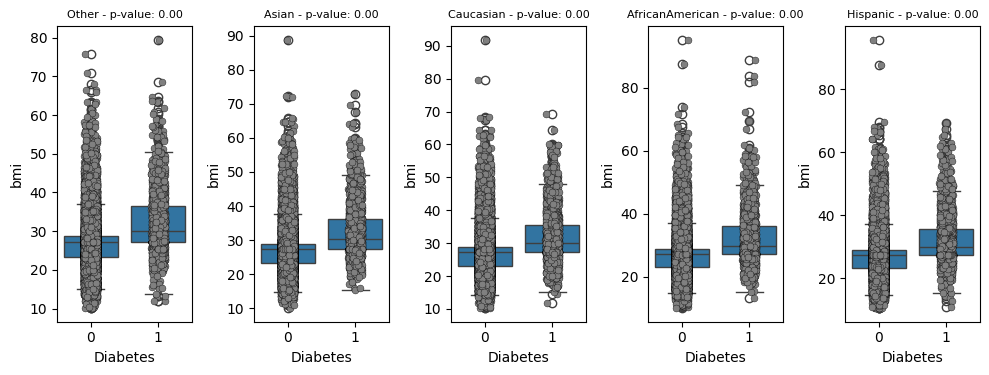

In [69]:
var = 'bmi'
groups = list(df.Ethnicity.unique())
fig, ax = plt.subplots(1, len(groups), figsize=(10, 4))
for ix, ethn in enumerate(groups):

  diabetic = df[(df['diabetes'] == 1) & (df['Ethnicity'] == ethn)][var]
  non_diabetic = df[(df['diabetes'] == 0) & (df['Ethnicity'] == ethn)][var]

  stat, p_value = ttest_ind(diabetic, non_diabetic)
  #print(f"T-test p-value: {p_value}")
  sns.boxplot(data = df[df['Ethnicity'] == ethn], ax = ax[ix], x = 'diabetes', y = var)
  sns.stripplot(data = df[df['Ethnicity'] == ethn], ax = ax[ix], x = 'diabetes', y = var, color = '.5', edgecolor='k', linewidth = 0.25)
  ax[ix].set_title(f'Ethnicity: {ethn}')
  ax[ix].set_xlabel('Diabetes')
  ax[ix].set_ylabel(var)
  ax[ix].set_title(f'{ethn} - p-value: {p_value:.2f}', fontsize = 8)
    #ax[ix].set_ylim(0, 300)
plt.suptitle('')
plt.tight_layout()
plt.show()

In [60]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['hypertension'], df['diabetes'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test p-value: {p}")


Chi-square test p-value: 0.0


4. Machine Learning Approaches

4.1 Feature Engineering

Encode categorical variables (e.g., gender, race, smoking history) using one-hot encoding or label encoding.

In [76]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])
df['smoking_history'] = label_enc.fit_transform(df['smoking_history'])


4.2 Splitting Data

Split the dataset into training and test sets (80/20 split).

In [98]:
from sklearn.model_selection import train_test_split

#X = df.drop(columns=['year', 'diabetes', 'age', 'location', 'Ethnicity', 'blood_glucose_level', 'hbA1c_level'])
X = df.drop(columns=['year', 'diabetes', 'age', 'location', 'Ethnicity', 'blood_glucose_level'])
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Features considered for prediction: {X.columns}')

Features considered for prediction: Index(['gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'blood_glucose_level'],
      dtype='object')


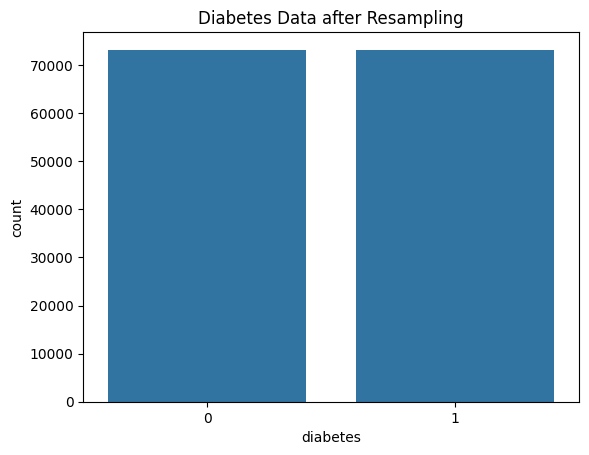

In [99]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, auc, confusion_matrix, accuracy_score, classification_report, f1_score
from imblearn.over_sampling import SMOTE


# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy= 'auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

sns.countplot(x= y_train_resampled)
plt.title('Diabetes Data after Resampling')
plt.show()

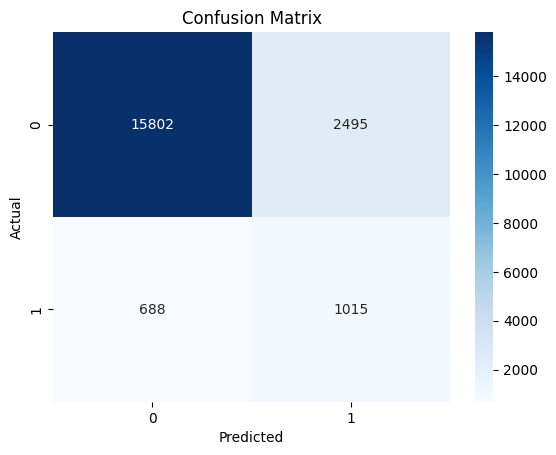

Accuracy: 0.84085


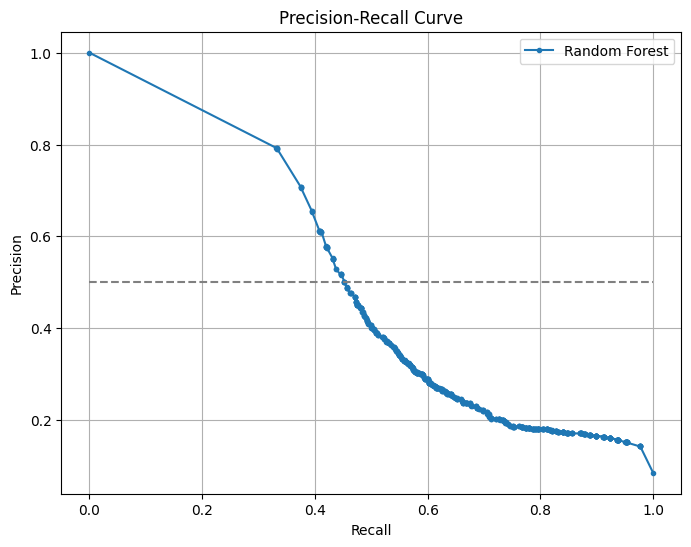

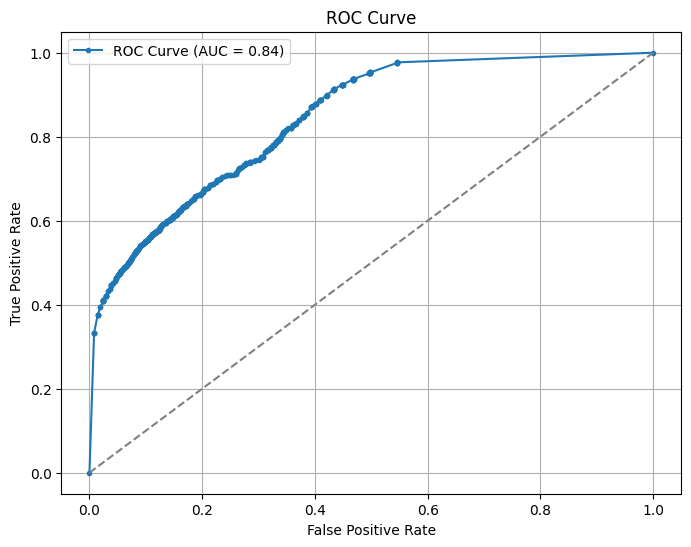

ROC AUC Score: 0.84
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     18297
           1       0.29      0.60      0.39      1703

    accuracy                           0.84     20000
   macro avg       0.62      0.73      0.65     20000
weighted avg       0.90      0.84      0.86     20000



In [100]:
# Train a classifier with 5-fold cross-validation
clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_scores = cross_val_predict(clf, X_train_resampled, y_train_resampled, cv=5, method='predict_proba')[:, 1]

# Get prediction probabilities on test set
clf.fit(X_train_resampled, y_train_resampled)
y_scores_test = clf.predict_proba(X_test)[:, 1]

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Get prediction probabilities
y_scores = clf.predict_proba(X_test)[:, 1]

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Print AUC Score
print(f'ROC AUC Score: {roc_auc:.2f}')
print(classification_report(y_test, y_pred))


The model is good at telling the two classes apart (AUC = 0.91).

It finds most of the "1s" (82% recall) but often guesses wrong (low precision, 29%).
It’s really sure about "0s" (98% precision) but misses some (81% recall).
Basically, it catches most of the important cases but also makes mistakes. If messing up a "1" is bad, we might want to adjust things.

F1-score is a mix of precision and recall. It tells how balanced they are. The model's F1 for class 1 is 0.43, meaning it finds many positives but makes mistakes.
Accuracy (0.81) means the model gets most predictions right, but since class 0 is much bigger, it could be right just by guessing "0" a lot.

Optimal Threshold for F1-score: 0.98
Optimized F1-score: 0.49
Optimized Accuracy: 0.93


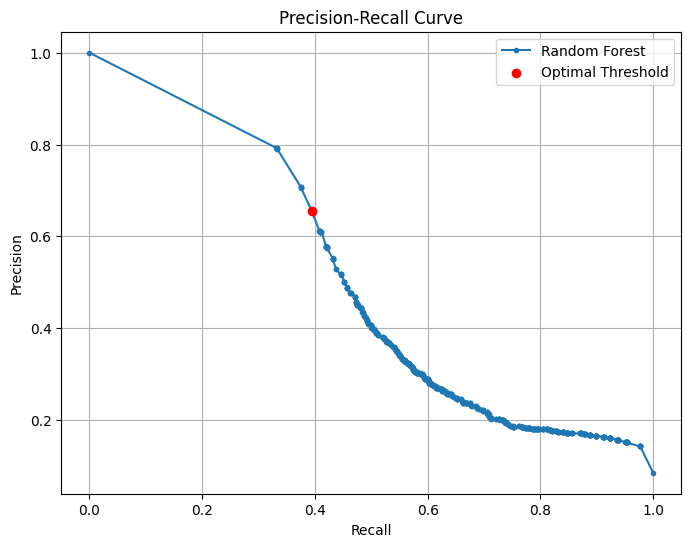

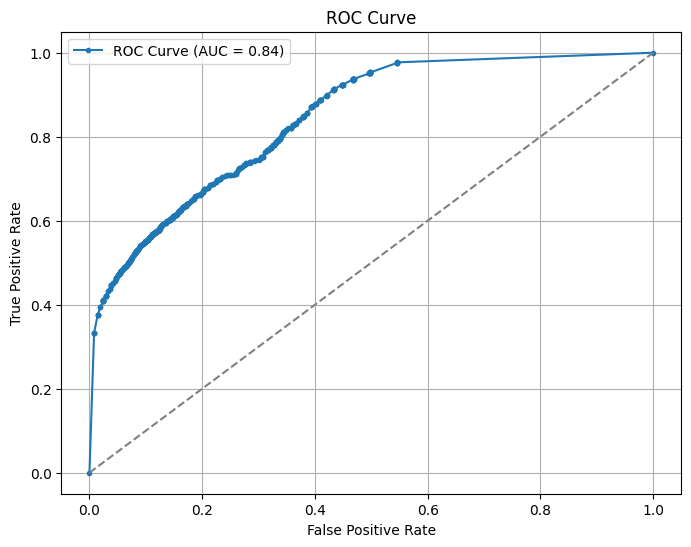

ROC AUC Score: 0.84
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     18297
           1       0.29      0.60      0.39      1703

    accuracy                           0.84     20000
   macro avg       0.62      0.73      0.65     20000
weighted avg       0.90      0.84      0.86     20000



In [101]:
# Train a classifier with 5-fold cross-validation
clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_scores = cross_val_predict(clf, X_train_resampled, y_train_resampled, cv=5, method='predict_proba')[:, 1]

# Get prediction probabilities on test set
clf.fit(X_train_resampled, y_train_resampled)
y_scores_test = clf.predict_proba(X_test)[:, 1]

# Find optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_test)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)  # Avoid division by zero
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold for F1-score: {optimal_threshold:.2f}')

# Apply optimal threshold
y_pred_optimal = (y_scores_test >= optimal_threshold).astype(int)

# Calculate and print metrics
f1 = f1_score(y_test, y_pred_optimal)
accuracy = accuracy_score(y_test, y_pred_optimal)
print(f'Optimized F1-score: {f1:.2f}')
print(f'Optimized Accuracy: {accuracy:.2f}')

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label='Optimal Threshold', zorder=3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_test)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Print AUC Score
print(f'ROC AUC Score: {roc_auc:.2f}')
print(classification_report(y_test, y_pred))

